# Model Training and Prediction

In this notebook, we perform the following steps:

- Load the preprocessed training and test datasets.
- Set up a classification pipeline using PyCaret and identify the best-performing model through automatic comparison.
- Train the selected model and evaluate its performance on both the training and test datasets.
- Make predictions on the test dataset.
- Prepare the submission file containing the predicted results.

This notebook focuses on the modeling and evaluation phases of the Spaceship Titanic competition.


In [1]:
!pip install pycaret
!pip install catboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pycaret.classification import *
from catboost import CatBoostClassifier

## Loading Data
- Loaded the preprocessed training features (`train_x.csv`), training labels (`train_y.csv`), testing features (`test_x.csv`), and testing labels (`test_y.csv`).
- Merged the training features and labels into `combined_data` for easier exploration.


In [3]:
train_x = pd.read_csv('train_x.csv')
train_y = pd.read_csv('train_y.csv')
test_x = pd.read_csv('test_x.csv')
test_y = pd.read_csv('test_y.csv')

submission_data = pd.read_csv('sample_submission.csv')

In [4]:
combined_data = pd.concat([train_x, train_y], axis=1)
combined_data.shape

(8693, 18)

## Correlation Analysis and Feature Removal
- Computed the correlation matrix for the combined dataset (`combined_data`) to analyze relationships between features and the target variable.
- Visualized the correlation matrix using a heatmap for better understanding.

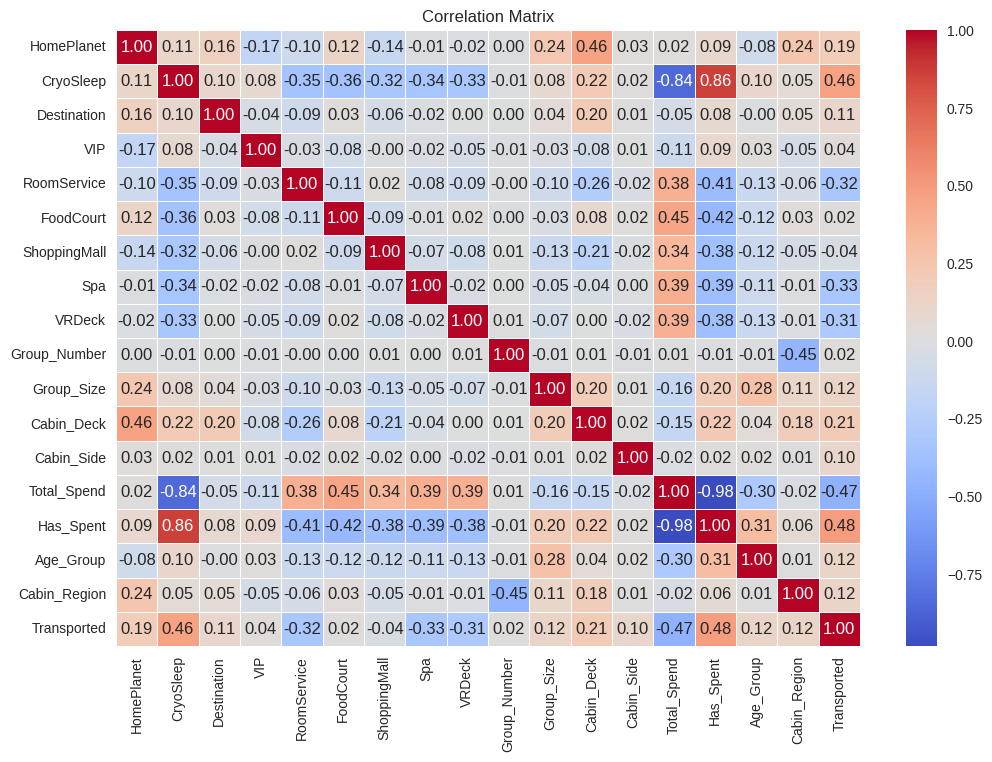

In [5]:
correlation_matrix = combined_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Observations from the correlation matrix:
  - Features such as `VIP`, `FoodCourt`, `ShoppingMall`, and `Group Number` have very low correlation with the target.
  - Since `VIP` is unrelated to other features, while others show some interrelations, only the `VIP` feature will be removed for further processing.

In [6]:
combined_data.drop(columns='VIP', inplace=True)

## Model Training and Evaluation
- Set up the PyCaret classification environment and normalized the features.
- Used the `compare_models` function to identify the best-performing model.
- Trained the best model on the training dataset and evaluated its performance on both the training and test datasets.
- Made predictions on the test data and created a submission DataFrame with `PassengerId` and predicted `Transported` values.
- Converted the predictions to boolean format and prepared the submission file.


In [7]:
train_data_with_target = combined_data
# Setup PyCaret classification
clf_setup = setup(
    data=train_data_with_target,
    target='Transported',
    normalize=True,
    session_id=42
)

,Description,Value
0,Session id,42
1,Target,Transported
2,Target type,Binary
3,Original data shape,"(8693, 17)"
4,Transformed data shape,"(8693, 17)"
5,Transformed train set shape,"(6085, 17)"
6,Transformed test set shape,"(2608, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8161,0.9028,0.8248,0.8136,0.8187,0.6322,0.6330,5.7150
lightgbm,Light Gradient Boosting Machine,0.8110,0.8983,0.8179,0.8096,0.8133,0.6220,0.6227,1.2860
xgboost,Extreme Gradient Boosting,0.8041,0.8919,0.7954,0.8125,0.8035,0.6083,0.6089,0.2130
gbc,Gradient Boosting Classifier,0.8039,0.8925,0.8323,0.7902,0.8104,0.6077,0.6090,1.7910
rf,Random Forest Classifier,0.8002,0.8842,0.7664,0.8252,0.7944,0.6005,0.6025,1.3610
et,Extra Trees Classifier,0.7995,0.8692,0.7638,0.8256,0.7933,0.5992,0.6012,0.8430
ridge,Ridge Classifier,0.7949,0.8623,0.8529,0.7667,0.8072,0.5894,0.5938,0.0710
lda,Linear Discriminant Analysis,0.7949,0.8623,0.8522,0.7671,0.8071,0.5894,0.5937,0.0380
lr,Logistic Regression,0.7929,0.8643,0.8414,0.7695,0.8036,0.5856,0.5886,0.9370
qda,Quadratic Discriminant Analysis,0.7898,0.8694,0.8542,0.7592,0.8036,0.5792,0.5844,0.0370


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [9]:
best_model.fit(train_x, train_y)
best_model.score(train_x, train_y), best_model.score(test_x, test_y)

(0.8780628091567928, 0.4816460135609072)

In [10]:
y_pred = best_model.predict(test_x)

submission = pd.DataFrame({
    'PassengerId': submission_data['PassengerId'],
    'Transported': y_pred
})

submission['Transported'] = submission['Transported'].astype(bool)

# Save the submission file
#submission.to_csv('submission.csv', index=False)

print("Submission file created: 'submission.csv'")

Submission file created: 'submission.csv'


![Spaceship Titanic Result](titanic_spaceship_result.png)